In [1]:
import pandas as pd
import requests

def get_world_bank_data(indicator):
    # Most populus  countries per Americas, Europe, Asia, and Africa: India, Indonesia, Japan, Philippines, Thailand, South Korea, Taiwan,
    # Brazil, Mexico, Colombia, Argentina, Chile, United States, Germany, United Kingdom, France, Italy, Spain, Canada
    # countries with world bank api country codes
    countries_worldbank = ['BRA', 'MEX', 'COL', 'ARG', 'CHL', 'URY', 'JAM', 'CRI', 'IND', 'IDN', 'JPN', 'PHL', 'THA', 'KOR', 'TWN', 'ISR', 'MNG', 'USA', 'CAN', 'DEU', 'GBR', 'FRA', 'ITA', 'ESP', 'PRT', 'BEL', 'AUT', 'FIN', 'NOR', 'SWE', 'CHE', 'IRL', 'SGP', 'NLD', 'DNK', 'ISL', 'LUX', 'ALB', 'BGR', 'HRV', 'CZE', 'EST', 'GRC', 'HUN', 'XKX', 'LVA', 'LTU', 'MLT', 'POL', 'ROU', 'SRB', 'SVK', 'SVN', 'AUS']
    url = f'http://api.worldbank.org/v2/country/%s/indicator/{indicator}?date=2022&format=json'
    values = []
    
    for country in countries_worldbank:
        data = requests.get(url %country).json()
        
        try:
            for d in data[1]:
                values.append({
                    'country': d['country']['value'],
                    'year': d['date'],
                    'value': d['value']
                })
        except Exception as e:
            print(e)
            print(data)
            
        df = pd.DataFrame(values).sort_values(by=['country', 'year'])
    return df

In [2]:
# gets the acled data for each of the countries
api_key = 'DzWZ29-TG!L6AgSmhbPG'
email = 'yu.melo@northeastern.edu'

# Countries: Brazil, Mexico, Colombia, Argentina, Chile, Uruguay, Jamaica, Costa Rica, India, Indonesia, Japan, Philippines, Thailand, South Korea, Taiwan, Israel, Mongolia, United States, Canada, Germany, United Kingdom, France, Italy, Spain, Portugal, Belgium, Austria, Finland, Norway, Sweden, Switzerland, Ireland, Singapore, Netherlands, Denmark, Iceland, Luxembourg, Albania, Bulgaria, Croatia, Czech Republic, Estonia, Greece, Hungary, Kosovo, Latvia, Lithuania, Malta, Poland, Romania, Serbia, Slovakia, Slovenia, Australia
countries = 'Brazil|Mexico|Colombia|Argentina|Chile|Uruguay|Jamaica|Costa%20Rica|India|Indonesia|Japan|Philippines|Thailand|South%20Korea|Taiwan|Israel|Mongolia|United%20States|Canada|Germany|United%20Kingdom|France|Italy|Spain|Portugal|Belgium|Austria|Finland|Norway|Sweden|Switzerland|Ireland|Singapore|Netherlands|Denmark|Iceland|Luxembourg|Albania|Bulgaria|Croatia|Czech%20Republic|Estonia|Greece|Hungary|Kosovo|Latvia|Lithuania|Malta|Poland|Romania|Serbia|Slovakia|Slovenia|Australia'
fields = 'event_id_cnty|event_date|event_type|sub_event_type|country|latitude|longitude|location'
years = '2022'

url = f'https://api.acleddata.com/acled/read.csv?key={api_key}&email={email}&country={countries}&event_type=Protests&limit=0&year={years}&fields=event_id_cnty|event_date|event_type|sub_event_type|country|latitude|longitude|location'

data = pd.read_csv(url)

# turns the event_date column into a datetime object
data['event_date'] = pd.to_datetime(data['event_date'])
print(data['event_date'].dtype)

# makes a dataframe with the number of events per country per year
grouped_data = data.groupby([data['event_date'].dt.year, 'country']).size().reset_index(name='counts')

# turns the year column into a string
grouped_data['event_date'] = grouped_data['event_date'].astype(str)
print(grouped_data['event_date'].dtype)
grouped_data


datetime64[ns]
object


,event_date,country,counts
0,2022,Albania,147
1,2022,Argentina,2469
2,2022,Australia,794
3,2022,Austria,294
4,2022,Belgium,523
5,2022,Brazil,3728
6,2022,Bulgaria,605
7,2022,Canada,1828
8,2022,Chile,927
9,2022,Colombia,1364


In [9]:
gov_trust_df = pd.read_csv('gov_trust.csv')
gov_trust_df['event_date'] = gov_trust_df['event_date'].astype(str)
# filter so it only has the year 2022
gov_trust_df = gov_trust_df[gov_trust_df['event_date'] == '2022']
# rename event_date to year
gov_trust_df

,country,event_date,public_trust_percentage
656,Australia,2022,49.9
657,Austria,2022,61.0
658,Belgium,2022,57.2
659,Brazil,2022,39.2
660,Canada,2022,50.7
661,Chile,2022,28.7
662,Colombia,2022,29.7
663,Costa Rica,2022,60.0
664,Czechia,2022,34.1
665,Denmark,2022,63.5


In [3]:
df_pop = get_world_bank_data('SP.POP.TOTL').rename(columns={'value': 'population'})
df_gdp = get_world_bank_data('NY.GDP.PCAP.CD').rename(columns={'value': 'gdp per capita'})
df_gini = get_world_bank_data('SI.POV.GINI').rename(columns={'value': 'gini coefficient'})
df_unemployment = get_world_bank_data('SL.UEM.TOTL.ZS').rename(columns={'value': 'unemployment rate'})
df_urbanization = get_world_bank_data('SP.URB.TOTL.IN.ZS').rename(columns={'value': 'urbanization rate'})
df_inflation = get_world_bank_data('FP.CPI.TOTL').rename(columns={'value': 'inflation rate'})

'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]
'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]
'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]
'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]
'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]
'NoneType' object is not iterable
[{'page': 0, 'pages': 0, 'per_page': 0, 'total': 0, 'sourceid': None, 'lastupdated': None}, None]


In [4]:
import pandas as pd

# Merging data frames
# merges the acled data with the population data and calculates the number of protests per capita
df_merged = pd.merge(grouped_data, df_pop, on='country')
df_merged['protests per capita'] = df_merged['counts'] / df_merged['population'] * 1000000

df = pd.merge(df_merged, df_gdp, on=['country', 'year'])
df = pd.merge(df, df_unemployment, on=['country', 'year'])
df = pd.merge(df, df_urbanization, on=['country', 'year'])
df = pd.merge(df, df_inflation, on=['country', 'year'])

# drop event_date column
df = df.drop(columns=['event_date','counts','year'])

# insert 169.5 for the inflation rate for argentina in 2022
df.loc[(df['country'] == 'Argentina') & (df['inflation rate'].isnull()), 'inflation rate'] = 169.5

# Saving data frame to csv
# df.to_csv('world_bank_data.csv', index=False)
df



,country,population,protests per capita,gdp per capita,unemployment rate,urbanization rate,inflation rate
0,Albania,2777689,52.921691,6810.114041,11.629,63.799,131.750835
1,Argentina,46234830,53.401299,13650.604629,6.805,92.347,169.500000
2,Australia,26005540,30.531956,65099.845912,3.700,86.488,132.466181
3,Austria,9041851,32.515466,52084.681195,4.990,59.256,133.513566
4,Belgium,11685814,44.755119,49926.825430,5.560,98.153,132.456219
5,Brazil,215313498,17.314288,8917.674911,9.230,87.555,204.482121
6,Bulgaria,6465097,93.579416,13974.449249,4.270,76.363,138.584408
7,Canada,38929902,46.956193,55522.445688,5.280,81.752,129.858329
8,Chile,19603733,47.286912,15355.479740,8.250,87.912,158.625027
9,Colombia,51874024,26.294471,6624.165393,10.550,82.050,164.780806


In [11]:
# merge the data with the government trust data
# df = pd.merge(df, gov_trust_df, on='country')
# df

In [1]:
# reads in world bank data
df1 = pd.read_csv('world_bank_data.csv')

gov_trust_df = pd.read_csv('gov_trust.csv')
# rename event_date to year
gov_trust_df = gov_trust_df.rename(columns={'event_date': 'year'})
# only keep the year 2022
gov_trust_df = gov_trust_df[gov_trust_df['year'] == 2022]

df = pd.merge(df1, gov_trust_df, on=['country'])

# renames the public_trust_percentage column to public trust
df = df.rename(columns={'public_trust_percentage': 'public trust'})
print(df)

# performs k-means clustering on df
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# insert 169.5 for the inflation rate for argentina in 2022
df.loc[(df['country'] == 'Argentina') & (df['inflation rate'].isnull()), 'inflation rate'] = 169.5

# Selecting features
X = df[['protests per capita', 'gdp per capita']]
# Normalizing features
X = (X - X.mean()) / X.std()

# K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

# outputs clusters with the countries in them
for cluster in range(4):
    print(f'Cluster {cluster}')
    print(df[df['cluster'] == cluster]['country'].values)
    print()

#plots the clusters, gdp per capita vs protests per capita
plt.scatter(df['gdp per capita'], df['protests per capita'], c=df['cluster'])
plt.xlabel('GDP per capita')
plt.ylabel('Protests per capita')
plt.show()

# # plots the clusters, population vs protests per capita
# plt.scatter(df['population'], df['protests per capita'], c=df['cluster'])
# plt.xlabel('Population')
# plt.ylabel('Protests per capita')
# plt.show()

# # plots the clusters, unemployment rate vs protests per capita
# plt.scatter(df['unemployment rate'], df['protests per capita'], c=df['cluster'])
# plt.xlabel('Unemployment rate')
# plt.ylabel('Protests per capita')
# plt.show()

# # plots the clusters, urbanization rate vs protests per capita
# plt.scatter(df['urbanization rate'], df['protests per capita'], c=df['cluster'])
# plt.xlabel('Urbanization rate')
# plt.ylabel('Protests per capita')
# plt.show()

# # plots the clusters, inflation rate vs protests per capita
# plt.scatter(df['inflation rate'], df['protests per capita'], c=df['cluster'])
# plt.xlabel('Inflation rate')
# plt.ylabel('Protests per capita')
# plt.show()





NameError: name 'pd' is not defined

Cluster 0
['Brazil' 'Colombia' 'Indonesia' 'Japan' 'Philippines' 'Romania'
 'Thailand']

Cluster 1
['Australia' 'Ireland' 'Luxembourg' 'Singapore' 'Switzerland'
 'United States']

Cluster 2
['Bulgaria' 'Denmark' 'Finland' 'France' 'Iceland' 'Israel' 'Italy'
 'Malta' 'Norway' 'Spain' 'Sweden']

Cluster 3
['India']

Cluster 4
['Albania' 'Austria' 'Belgium' 'Canada' 'Chile' 'Costa Rica' 'Croatia'
 'Estonia' 'Germany' 'Greece' 'Hungary' 'Jamaica' 'Latvia' 'Lithuania'
 'Mexico' 'Mongolia' 'Netherlands' 'Poland' 'Portugal' 'Serbia' 'Slovenia'
 'United Kingdom' 'Uruguay']



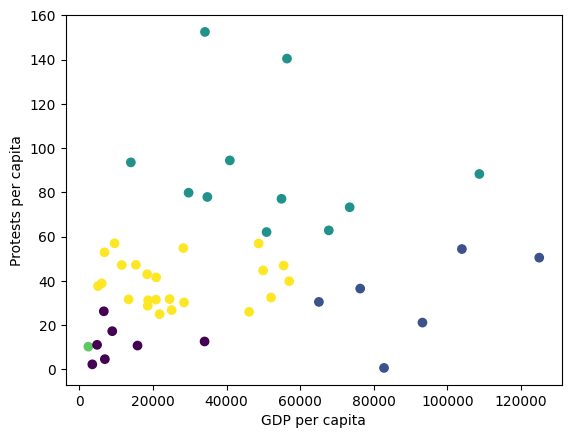

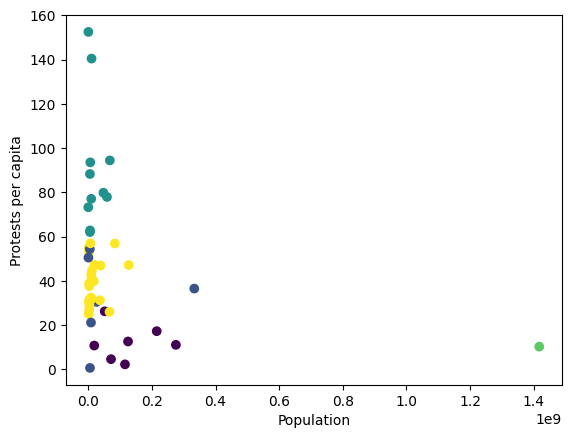

In [6]:
# reads in world bank data
df = pd.read_csv('world_bank_data.csv')
df

# performs k-means clustering on df
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# drops rows with missing values
df = df.dropna()


# Selecting features
X = df[['protests per capita', 'gdp per capita', 'population']]
# Normalizing features
X = (X - X.mean()) / X.std()

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

# outputs clusters with the countries in them
for cluster in range(5):
    print(f'Cluster {cluster}')
    print(df[df['cluster'] == cluster]['country'].values)
    print()
    
# plots the clusters, gdp per capita vs protests per capita
plt.scatter(df['gdp per capita'], df['protests per capita'], c=df['cluster'])
plt.xlabel('GDP per capita')
plt.ylabel('Protests per capita')
plt.show()

# plots the clusters, population vs protests per capita
plt.scatter(df['population'], df['protests per capita'], c=df['cluster'])
plt.xlabel('Population')
plt.ylabel('Protests per capita')
plt.show()
